## Task 5. P8 Logistic Regression

![](https://raw.githubusercontent.com/datawhalechina/Leeml-Book/master/docs/chapter9/res/chapter9-0.jpg)


> 目标：根据后验概率进行分类--接上一节课，是通过sigmod函数和线性变换器。

<img src="https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/P9_1.png?raw=true" width="500" align='center'>

> 关键是估计其中的参数--极大似然估计或等价极小化[交叉熵](https://blog.csdn.net/rtygbwwwerr/article/details/50778098)[1](http://www.win-vector.com/dfiles/LogisticRegressionMaxEnt.pdf)

<img src="https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/P9_2.png?raw=true" width="500" align='center'>

> 求解算法--梯度下降

<img src="https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/P9_3.png?raw=true" width="500" align='center'>

> 和线性回归的对比，**参数更新过程一样**

<img src="https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/P9_4.png?raw=true" width="500" align='center'>

> 但是对于LR模型，选用 MSE 是不合适的，因为此时的梯度不管在哪一类处都非常小，将很难收敛。

<img src="https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/P9_5.png?raw=true" width="500" align='center'>

> 相较于前一课的生成模型，判别模型表现似乎更加优良，因为他没有给出任何假设，而生成模型则假设了高斯分布，条件独立等等。silde给出了一个生成模型失效的例子，因为样本不够多而假设不合理所导致。但是生成模型也有一些好处：

<img src="https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/P9_6.png?raw=true" width="500" align='center'>

> 多分类问题， **Softmax**转化并同样基于交叉熵进行参数估计。

<img src="https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/P9_7.png?raw=true" width="500" align='center'>

> LR的限制，从推导可以看出，他只对线性可分问题有效。而在非线性可分的情况下，可以通过多个LR进行参数转化**Feature Transformation**，然后对转化后的特征构建线性可分分类器。

<img src="https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/P9_8.png?raw=true" width="500" align='center'>

> 最终，组合成一个神经网络。

<img src="https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/P9_9.png?raw=true" width="500" align='center'>


> 参考 
 1. https://shimo.im/docs/oQVUplqyJBEKFoIF/read
 2. https://datawhalechina.github.io/Leeml-Book/#/chapter9/chapter9
 3. https://www.cnblogs.com/shenxiaolin/p/8854869.html
 4. https://my.oschina.net/u/175377/blog/84420
 5. https://blog.csdn.net/qq_36523839/article/details/81604217

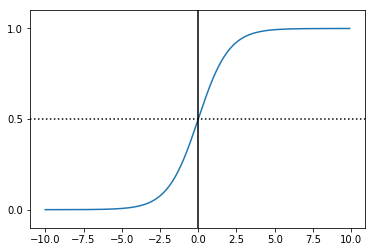

In [2]:
#Sigmoid曲线:  
import matplotlib.pyplot as plt  
import numpy as np  
  
def Sigmoid(x):  
    return 1.0 / (1.0 + np.exp(-x))  
  
x= np.arange(-10, 10, 0.1)  
h = Sigmoid(x)            #Sigmoid函数  
plt.plot(x, h)  
plt.axvline(0.0, color='k')   #坐标轴上加一条竖直的线（0位置）  
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')    
plt.axhline(y=0.5, ls='dotted', color='k')  #在y=0.5的地方加上黑色虚线  
plt.yticks([0.0,  0.5, 1.0])  #y轴标度  
plt.ylim(-0.1, 1.1)       #y轴范围  
plt.show()

Automatically created module for IPython interactive environment


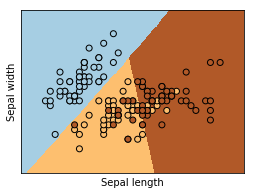

In [12]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()